In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Split the data into features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# For classification, convert quality to binary labels (e.g., good vs. bad)
y_class = y.apply(lambda x: 1 if x >= 7 else 0)  # 1 for good, 0 for bad


In [17]:
# Split into train and test sets for both classification and regression
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



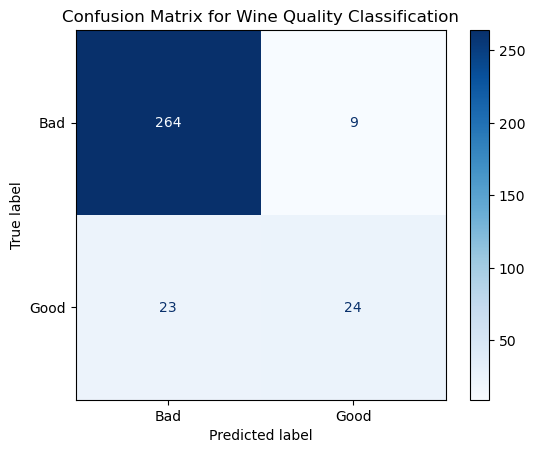

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Initialize and train the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train_class)

# Predict and evaluate
y_pred_class = clf.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Wine Quality Classification")
plt.show()

Regression Mean Squared Error: 0.314548125
Regression R-squared: 0.5186758917497274


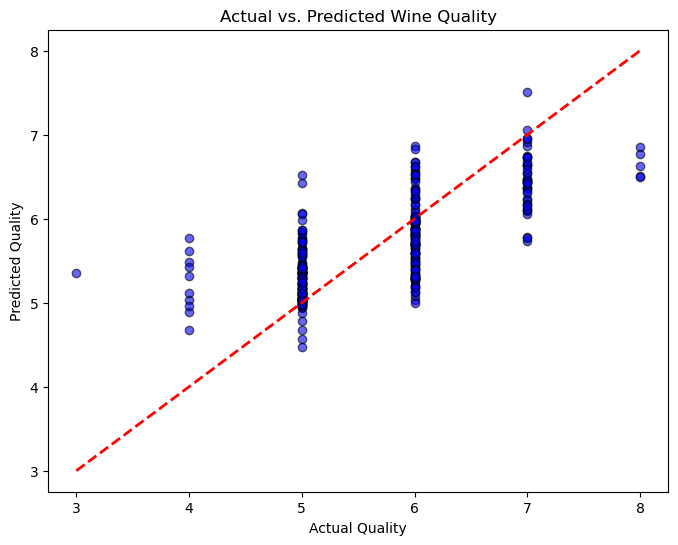

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize and train the regressor
reg = RandomForestRegressor()
reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg.predict(X_test_reg)
print("Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("Regression R-squared:", r2_score(y_test_reg, y_pred_reg))

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Wine Quality')
plt.show()


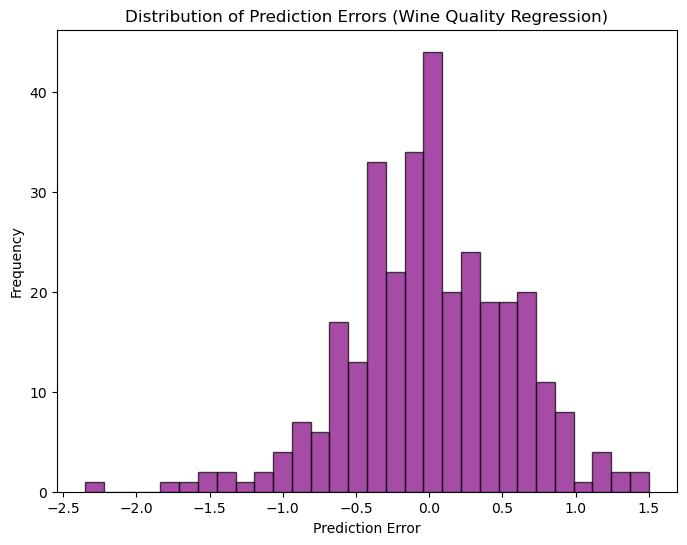

In [20]:
# Calculate errors
errors = y_test_reg - y_pred_reg

# Plot the error distribution
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Wine Quality Regression)')
plt.show()


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

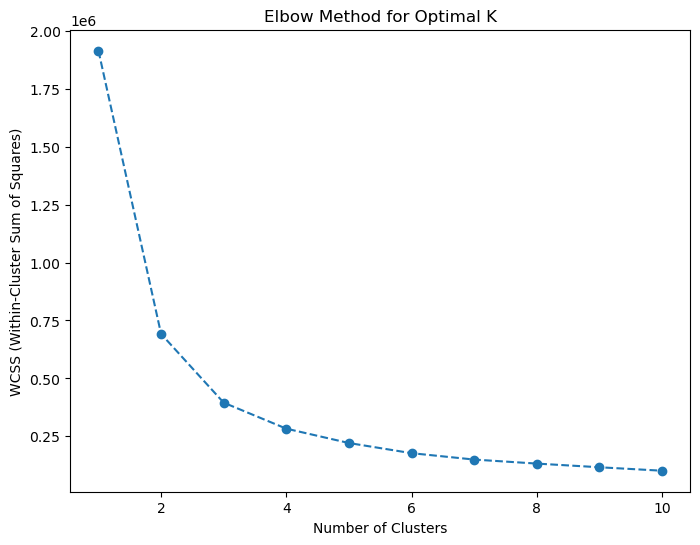

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-means with different values of K to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
X = data.drop('quality', axis=1)  # Using all features except 'quality'

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia: sum of squared distances of samples to their closest cluster center

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


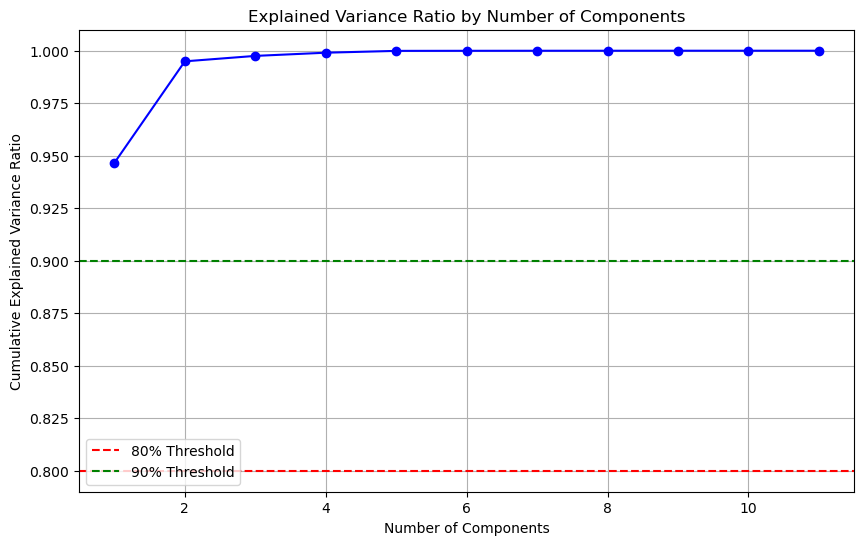

PC1: 94.66%
PC2: 4.84%
PC3: 0.26%
PC4: 0.15%
PC5: 0.09%
PC6: 0.00%
PC7: 0.00%
PC8: 0.00%
PC9: 0.00%
PC10: 0.00%
PC11: 0.00%

Components for 80% variance: 1
Components for 90% variance: 1


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA to your data
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 
         'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')

# Add horizontal lines for 80% and 90% thresholds
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Threshold')

plt.legend()
plt.grid(True)
plt.show()

# Print out detailed variance information
for i, ratio in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {ratio*100:.2f}%")

# Find number of components for 80% and 90% variance
components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print(f"\nComponents for 80% variance: {components_80}")
print(f"Components for 90% variance: {components_90}")

In [23]:
# Assume from the elbow plot that the optimal number of clusters is 3
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

# Adding the cluster labels to the original data
data['Cluster'] = clusters


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


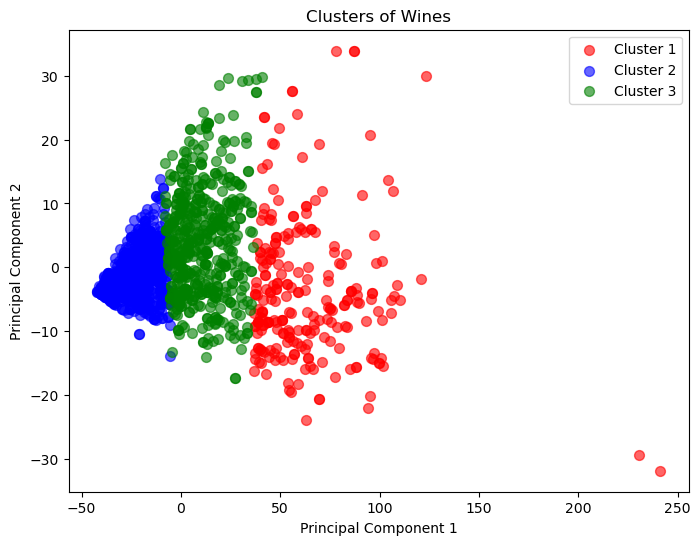

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Creating a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Plotting the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i in range(optimal_clusters):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PC1'], pca_df[pca_df['Cluster'] == i]['PC2'], 
                s=50, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Wines')
plt.legend()
plt.show()


In [25]:
wine_1 = data[(data.Cluster == 1)]
wine_2 = data[(data.Cluster == 2)]
wine_3 = data[(data.Cluster == 0)]


print(f'Cluster_1 df: {wine_1.shape}')
print(f'Cluster_2 df: {wine_2.shape}')
print(f'Cluster_3 df: {wine_3.shape}')

Cluster_1 df: (843, 13)
Cluster_2 df: (516, 13)
Cluster_3 df: (240, 13)


In [26]:
def create_wine_df(df):
    # transpose df, drop cuisine and unnamed rows, sum the row to get total for ingredient and add value header to new df
    wine_df = df.T.drop(['Cluster']).sum(axis=1).to_frame('value')
    # drop ingredients that have a 0 sum
    wine_df = wine_df[(wine_df.T != 0).any()]
    # sort df
    wine_df = wine_df.sort_values(by='value', ascending=False, inplace=False)
    return wine_df

<Axes: >

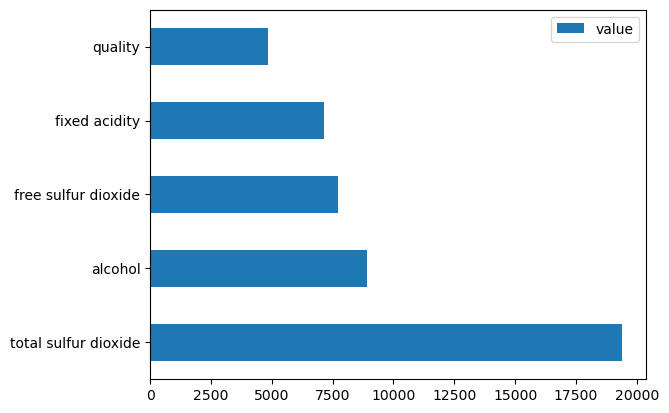

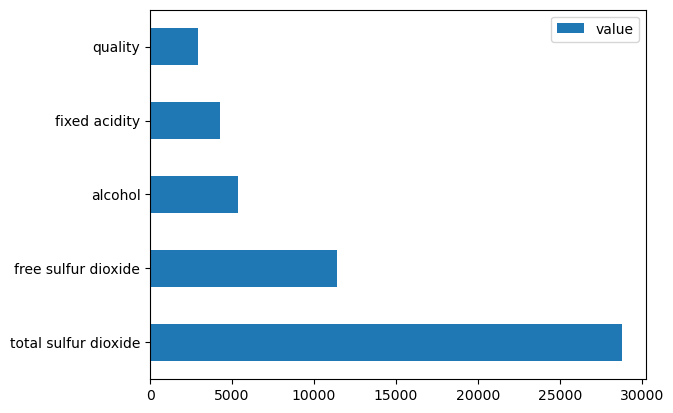

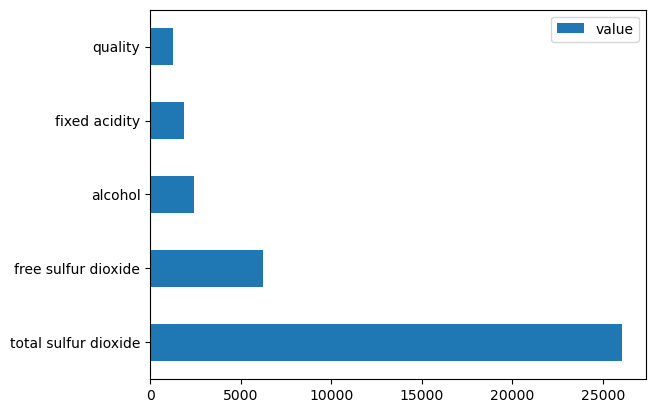

In [27]:
Cluster_1 = create_wine_df(wine_1)
Cluster_1.head(5).plot.barh()
Cluster_2 = create_wine_df(wine_2)
Cluster_2.head(5).plot.barh()
Cluster_3 = create_wine_df(wine_3)
Cluster_3.head(5).plot.barh()